In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [89]:
# since cabin has a lot of null values and is not that useful for training the dataset, we might just remove it
del df['Cabin']

In [90]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [91]:
num_df = df.select_dtypes(include='number')
num_df.corr()['Survived']

,Survived
PassengerId,-0.005007
Survived,1.000000
Pclass,-0.338481
Age,-0.069809
SibSp,-0.035322
Parch,0.081629
Fare,0.257307


<Axes: xlabel='Survived', ylabel='Age'>

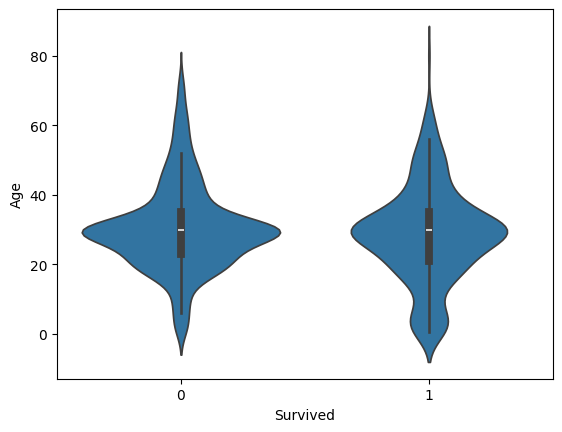

In [92]:
sns.violinplot(df, x='Survived', y='Age')

<Axes: xlabel='Survived', ylabel='Fare'>

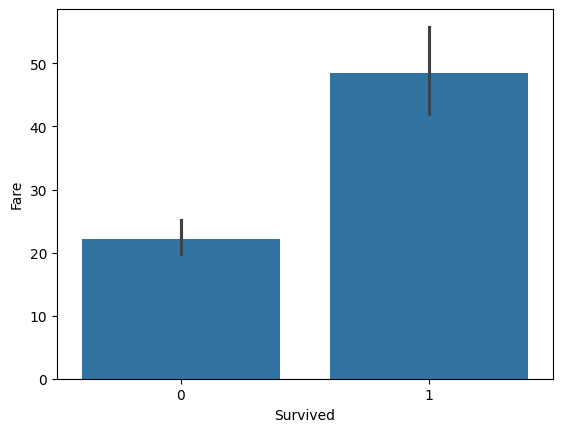

In [93]:
sns.barplot(df, x='Survived', y='Fare')

<Axes: xlabel='Survived', ylabel='count'>

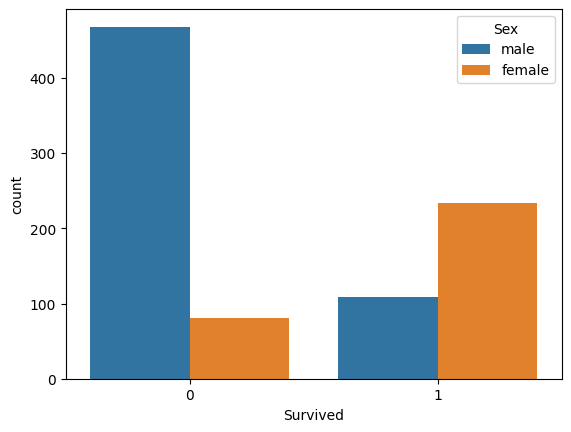

In [94]:
sns.countplot(df, x='Survived', hue='Sex')

In [95]:
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


# Training the Model

In [96]:
X_train = df.drop(columns=['PassengerId', 'Ticket', 'Name'])
y_train = X_train.pop('Survived')
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [97]:
# encoding categorical values and scaling the numerical values
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

categorical_cols = ['Sex', 'Embarked']
numerical_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

preprocessor = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(drop='first'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Embarked']),
                                                 ('num', StandardScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare'])])),
                ('model', LogisticRegression(max_iter=1000))])

# Testing Data

In [99]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [100]:
del test_df['Cabin']

In [101]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,0


In [102]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [103]:
X_test = test_df.drop(columns=['PassengerId', 'Ticket', 'Name'])
test_ids = test_df['PassengerId']

In [104]:
y_pred = pipeline.predict(X_test)

# Prediction Accuracy

In [105]:
vpred_df = pd.read_csv('verify_predictions.csv')
pred_df = pd.DataFrame({
    'PassengerId': test_ids,
    'Predicted Survival': y_pred
})
pred_df.to_csv('predictions.csv', index=False)

In [106]:
eval_df = pd.merge(vpred_df, pred_df, on='PassengerId')
eval_df.head()

,PassengerId,Survived,Predicted Survival
0,892,0,0
1,893,1,0
2,894,0,0
3,895,0,0
4,896,1,1


In [107]:
s_true = eval_df['Survived']
s_pred = eval_df['Predicted Survival']

In [108]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy: {accuracy_score(s_true,s_pred)*100:.2f}%")
print(classification_report(s_true, s_pred))

Accuracy: 94.26%
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       266
           1       0.92      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



## Inference
class 0 has a better precision and recall, that means the computer is slightly better at predicting who is dead than who is alive.
in class 0 we observe precision>recall which indicates that it is better at telling who is dead than recognizing all of dead people. however in class 1 ie survival, the model is better recognizing all of those who survived than giving correct values.

Overall Accuracy: `94.26%`